In [97]:
import os
import re
import sys
from pathlib import Path

import pandas as pd
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [98]:
spatial_omics_folder = (Path().cwd().parents[0]).absolute() / 'data' / 'spatial_omics_graph'
process_path = (Path().cwd().parents[0]).absolute() / 'data' / 'torch_graph_data'

In [99]:
d_dir = (Path().cwd().parents[0].parents[0]).absolute()
data_dir = d_dir / "09_datasets"

p_dir = (Path().cwd().parents[0]).absolute()

In [100]:
%load_ext autoreload
%autoreload 2

module_path = str(p_dir / "src")

if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [101]:
# Save data
save_path = (Path().cwd().parents[0]).absolute() / 'data' / 'adata'

# adata_combined = ad.read_h5ad(save_path / 'all.h5ad')
adata_foll = ad.read_h5ad(save_path / 'foll.h5ad')

In [102]:
# name_map = {'0': 'Other', '1':'B-cell', '2': 'B-cell', '3': 'Plasma cell', '5': 'FDC', '6': 'Other', '8': 'Ki67+ B-cell', '9': 'Other', '10': 'Macrophage', '15': 'FDC', '16': 'Ki67+ Macrophage'}
name_map =  { '1':'B-cell', '7':'FDC',  '0': 'Ki67+ B-cell', '4': 'Ki67+', '18': 'FDC', '8':'Other',  '11':'Macrophage',  '6':'Macrophage', '6':'Macrophage', '3':'Plasma Cell', '13':'Other','5': 'Ki67+ Macrophage',}

adata_foll.obs['name'] = (
    adata_foll.obs["merged"]
    .map(lambda x: name_map.get(x, x))
    .astype("category")
)

adata_foll.uns["name_colors"] = sc.pl.palettes.vega_20_scanpy[:len(np.unique(adata_foll.obs['name']))]

c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\scanpy\tools\_dendrogram.py:105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[group]):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\scanpy\tools\_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

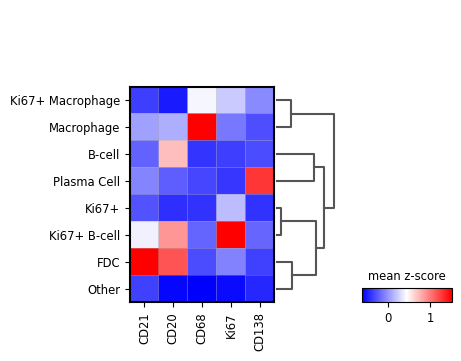

In [103]:
sc.tl.dendrogram(adata_foll, 'name')
sc.pl.matrixplot(adata_foll, adata_foll.var_names, 'name', dendrogram=True,
                 colorbar_title='mean z-score',  cmap='bwr', vmax=1.5)

c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


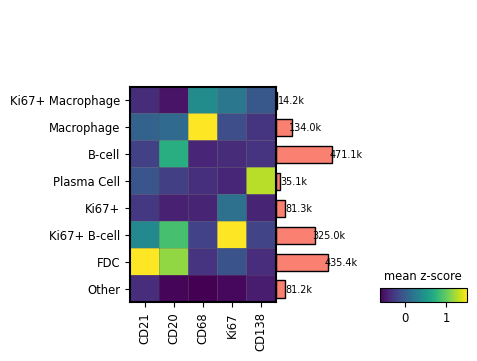

In [104]:
mp = sc.pl.matrixplot(adata_foll, adata_foll.var_names, 'name', dendrogram=True,
                 colorbar_title='mean z-score',  cmap='bwr', vmax=1.5 , return_fig=True)
mp.add_totals(size=1.0).style(edge_color='black', ).show()

In [105]:
import matplotlib

In [106]:
var = 'name'

cluster_label_order = adata_foll.uns[f'dendrogram_{var}']['categories_ordered']

colors = adata_foll.uns[f"{var}_colors"]
labels = adata_foll.obs[var].cat.categories.tolist()

colors_rgb = []
for color in colors:
    colors_rgb.append(matplotlib.colors.hex2color(color))
colors_rgb = np.array(colors_rgb) * 255
colors_rgb = colors_rgb.astype(np.uint8)

colors_rgb_dict = {k:v for k,v in zip(labels, colors_rgb)}

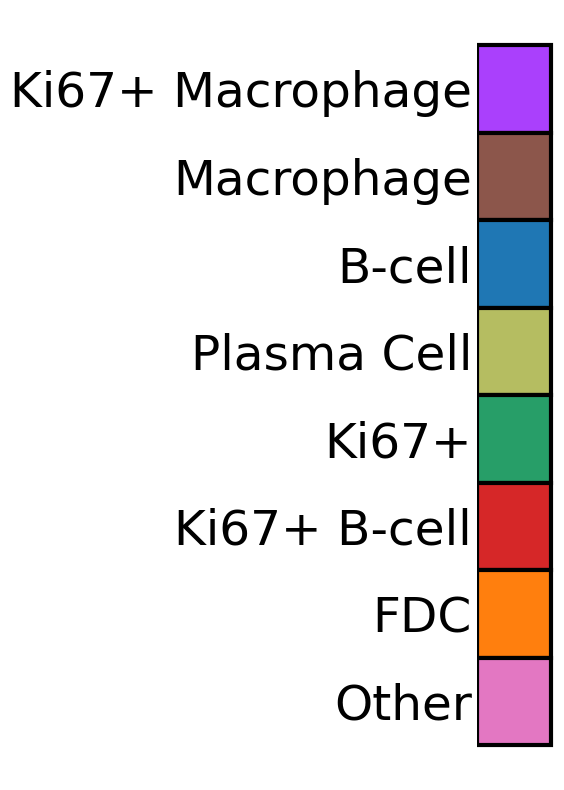

In [107]:
c=np.array([colors_rgb_dict[i] for i in cluster_label_order])

# legend
fig, ax = plt.subplots(figsize=(1,10))
ax.barh(y=range(len(colors_rgb_dict.values())), 
        color=c/255,
        width=1, 
        height=1,
        edgecolor='k',
        linewidth=3,
       )
_ = plt.yticks(range(len(colors_rgb_dict.values())), cluster_label_order, rotation=0, size=35)
_ = plt.xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
# ax.yaxis.tick_right()
ax.invert_yaxis()
ax.grid(False)

In [108]:
df_cluster = sc.get.obs_df(adata_foll, keys=['Dataset', 'name'])
df_cluster_count = df_cluster.value_counts().to_frame('counts').reset_index()
df_cluster_count['Density'] = df_cluster_count["counts"] / df_cluster_count.groupby('Dataset')["counts"].transform('sum')
df_cluster_count['Dataset'] = pd.Categorical(df_cluster_count['Dataset'])

C:\Users\thu71\AppData\Local\Temp\ipykernel_50400\1458610083.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cluster_count['Density'] = df_cluster_count["counts"] / df_cluster_count.groupby('Dataset')["counts"].transform('sum')


c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages

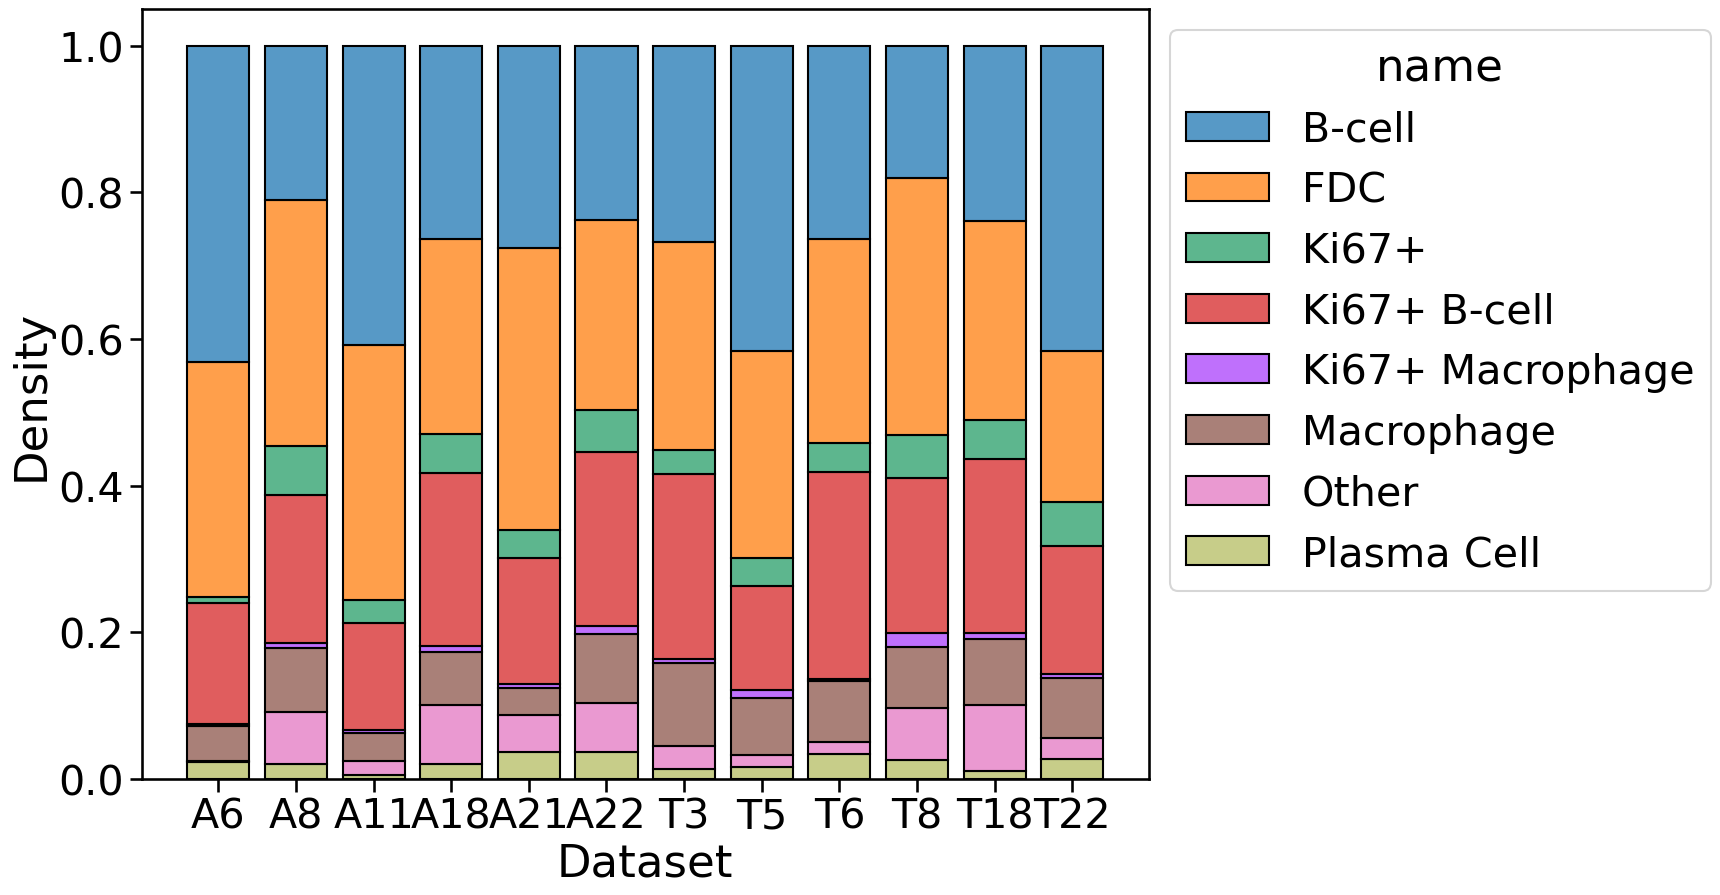

In [109]:
with sns.plotting_context('talk', font_scale=1.8):
    fig, ax = plt.subplots(figsize=(13, 10))
    ax = sns.histplot(data=df_cluster_count, x='Dataset' , hue='name', weights='Density',
                 multiple='stack', shrink=0.8, palette=adata_foll.uns['name_colors'])
    ax.set_ylabel('Density')
    # Fix the legend so it's not on top of the bars.
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((1, 1))
    ax.grid(False)

# Comparison

In [121]:
import seaborn as sns 
from statannotations.Annotator import Annotator

In [122]:
# Covid mapping from patient id to covid. Covid = 1, Normal = 0
covid_dict = {'3': 'Negative', '5': 'Positive', '6': 'Negative', '8':'Positive',
             '11': 'Positive', '18': 'Negative', '21':'Negative', '22': 'Positive'}

In [123]:
dfs = []

# Plot example of spatial projection
for d in adata_foll.obs.Dataset.unique():
    adata_donor = adata_foll[adata_foll.obs.Dataset == d, :]
    
    # Get Covid status
    covid_status = covid_dict[d[1:]]
    
    # Count cell type per follicles
    df = adata_donor.obs.groupby(['Foll', 'name']).size().reset_index()
    df.columns = ['Foll', 'Cluster', 'Count']
    df = df.pivot_table(values='Count', index='Foll', columns='Cluster').reset_index()
    df['Dataset'] = d
    df['Covid'] = covid_status
    
    dfs.append(df)
    

c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\thu71\AppData\Local\Temp\ipykernel_50400\3045146536.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = adata_donor.obs.groupby(['Foll', 'name']).size().reset_index()
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
C:\Users\thu71\AppData\Local\Temp\ipykernel_50400\3045146536.py:

## Foll size comparison

In [124]:
df = pd.concat(dfs)
df = df.reset_index(drop=True)

df['Count'] = df.iloc[:,1:-2].sum(axis=1)

c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Positive vs. Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:2.568e-01 U_stat=2.542e+04


c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


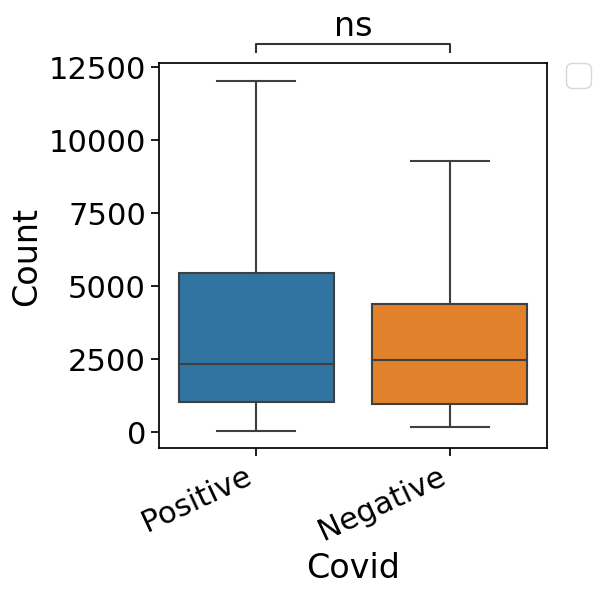

In [129]:
# plot
x = 'Covid'
y = 'Count'
# hue = 'Covid'
with sns.plotting_context('notebook', font_scale=2):
    pairs=[('Positive','Negative')]

    fig, ax = plt.subplots(figsize=(5,5))
    sns.boxplot(data=df, x=x, y=y, showfliers=False)
    plt.xticks(rotation = 25, ha="right")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    annotator = Annotator(ax, pairs, data=df, x=x, y=y)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()

In [131]:
df_subset = df.copy()
df_subset['Dataset'] = df_subset['Dataset'].apply(lambda x: {'A': 'Adenoid', 'T':'Tonsil'}.get(x[:1],x))

c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Adenoid vs. Tonsil: Mann-Whitney-Wilcoxon test two-sided, P_val:1.441e-01 U_stat=1.936e+04


c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


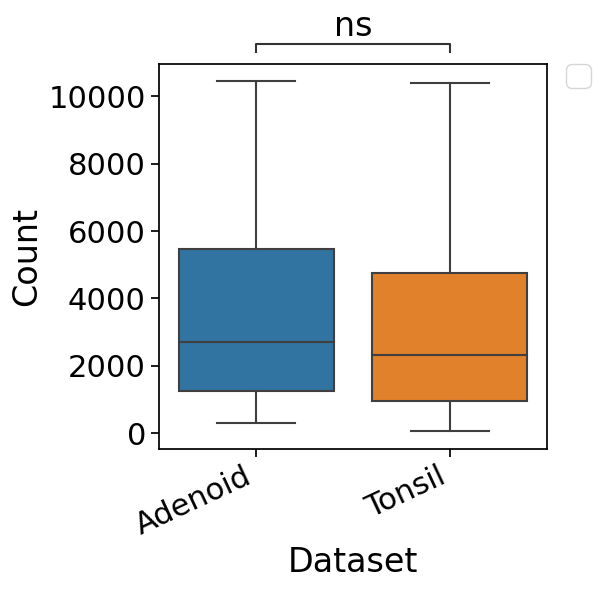

In [134]:
# plot
x = 'Dataset'
y = 'Count'
# hue = 'Covid'
with sns.plotting_context('notebook', font_scale=2):
    pairs=[('Adenoid','Tonsil')]

    fig, ax = plt.subplots(figsize=(5,5))
    sns.boxplot(data=df_subset, x=x, y=y, showfliers=False)
    plt.xticks(rotation = 25, ha="right")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    annotator = Annotator(ax, pairs, data=df_subset, x=x, y=y)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()

In [136]:
df

Cluster  Foll  B-cell     FDC  Ki67+  Ki67+ B-cell  Ki67+ Macrophage  \
0           1   673.0  1064.0   25.0         472.0               5.0   
1           2   652.0   496.0   39.0          88.0               7.0   
2           3   602.0   203.0   21.0          41.0              10.0   
3           4   639.0    42.0   14.0          13.0               1.0   
4           5   300.0   384.0    0.0          49.0               0.0   
..        ...     ...     ...    ...           ...               ...   
437        63    46.0   157.0  510.0         135.0              23.0   
438        64   151.0   171.0   71.0          49.0               4.0   
439        65     0.0     2.0  115.0           6.0               8.0   
440        66    81.0    85.0  169.0         148.0               9.0   
441        67     0.0    34.0   17.0           7.0               4.0   

Cluster  Macrophage  Other  Plasma Cell Dataset     Covid   Count  
0              91.0    7.0          5.0     A11  Positive  2342.0  
1              65.0   15.0          2.0     A11  Positive  1364.0  
2              38.0    0.0          6.0     A11  Positive   921.0  
3              77.0   29.0          0.0     A11  Positive   815.0  
4              19.0    4.0          0.0     A11  Positive   756.0  
..              ...    ...          ...     ...       ...     ...  
437            22.0  114.0         77.0      T8  Positive  1084.0  
438            18.0   68.0         15.0      T8  Positive   547.0  
439             3.0   46.0         23.0      T8  Positive   203.0  
440            20.0  123.0         33.0      T8  Positive   668.0  
441            15.0  367.0          2.0      T8  Positive   446.0  

[442 rows x 12 columns]

In [145]:
df = pd.concat(dfs)
df = df.reset_index(drop=True)

df['Count'] = df.loc[:,['B-cell', 'Ki67+ B-cell']].sum(axis=1)

c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Positive vs. Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:3.221e-01 U_stat=2.522e+04


c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


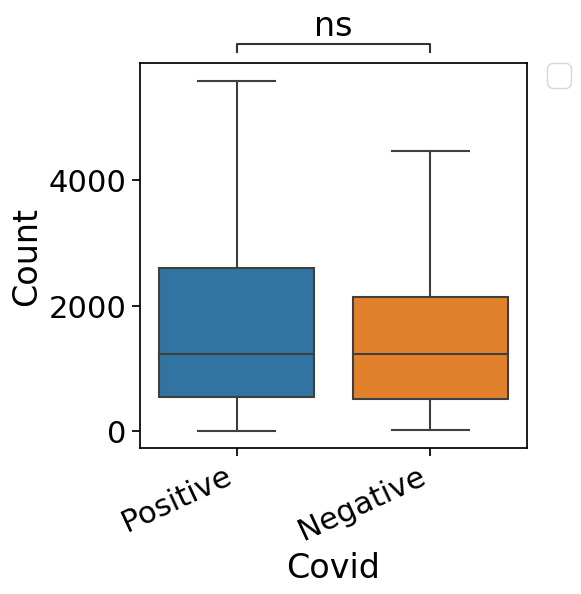

In [146]:
# plot
x = 'Covid'
y = 'Count'
# hue = 'Covid'
with sns.plotting_context('notebook', font_scale=2):
    pairs=[('Positive','Negative')]

    fig, ax = plt.subplots(figsize=(5,5))
    sns.boxplot(data=df, x=x, y=y, showfliers=False)
    plt.xticks(rotation = 25, ha="right")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    annotator = Annotator(ax, pairs, data=df, x=x, y=y)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()

In [141]:
df_subset = df.copy()
df_subset['Dataset'] = df_subset['Dataset'].apply(lambda x: {'A': 'Adenoid', 'T':'Tonsil'}.get(x[:1],x))

c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Adenoid vs. Tonsil: Mann-Whitney-Wilcoxon test two-sided, P_val:2.253e-01 U_stat=1.908e+04


c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


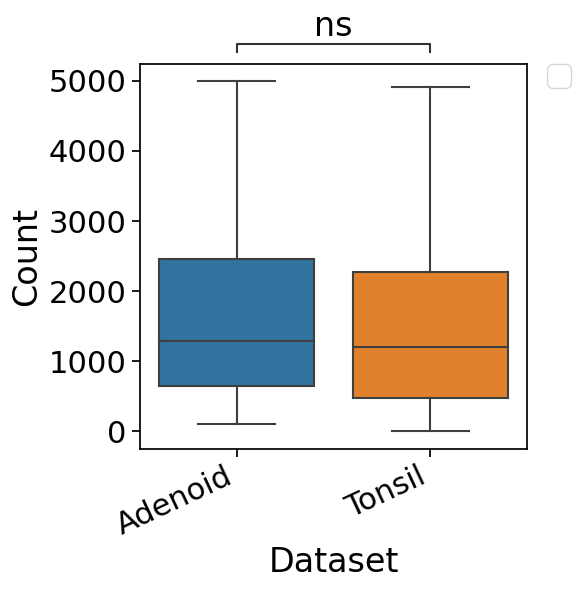

In [142]:
# plot
x = 'Dataset'
y = 'Count'
# hue = 'Covid'
with sns.plotting_context('notebook', font_scale=2):
    pairs=[('Adenoid','Tonsil')]

    fig, ax = plt.subplots(figsize=(5,5))
    sns.boxplot(data=df_subset, x=x, y=y, showfliers=False)
    plt.xticks(rotation = 25, ha="right")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    annotator = Annotator(ax, pairs, data=df_subset, x=x, y=y)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()

## Cell density comparison

In [115]:
df = pd.concat(dfs)
df = df.reset_index(drop=True)

# Normalize by row
df.iloc[:,1:-2] = df.iloc[:,1:-2].div(df.iloc[:,1:-2].sum(1), axis=0)


In [116]:
# df = df[~df.Dataset.isin(['A6', 'T6'])]

In [117]:
# Get data
df_subset = df.drop(['Foll', 'Dataset'], axis=1)
df_melt = df_subset.melt(id_vars=['Covid'], value_name='Density')

# plot
x = 'Cluster'
y = 'Density'
hue = 'Covid'
with sns.plotting_context('notebook', font_scale=2):
    pairs=[((c,'Positive'),(c,'Negative')) for c in df_melt.Cluster.unique()]

    fig, ax = plt.subplots(figsize=(10,3))
    sns.barplot(data=df_melt, x=x, y=y, hue=hue)
    plt.xticks(rotation = 25, ha="right")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    annotator = Annotator(ax, pairs, data=df_melt, x=x, y=y, hue=hue)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()


c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FDC_Positive vs. FDC_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:1.555e-01 U_stat=2.202e+04
B-cell_Positive vs. B-cell_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:1.183e-01 U_stat=2.598e+04
Ki67+_Positive vs. Ki67+_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:2.784e-04 U_stat=2.874e+04
Ki67+ B-cell_Positive vs. Ki67+ B-cell_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:1.527e-05 U_stat=1.816e+04
Ki67+ Macrophage_Positive vs. Ki67+ Macrophage_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:5.461e-11 U_stat=3.262e+04
Macrophage_Positive vs. Macrophage_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:5.615e-01 U_stat=2.314e+04
Other_Positive vs. Other_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:2.002e-01 U_stat=2.561e+04
Plasma Cell_Positive vs. Plasma C

In [118]:
# Get data
df_a = df[df.Dataset.str.contains('T')]
df_subset = df_a.drop(['Foll', 'Dataset'], axis=1)
df_melt = df_subset.melt(id_vars=['Covid'], value_name='Density')

# plot
x = 'Cluster'
y = 'Density'
hue = 'Covid'
with sns.plotting_context('notebook', font_scale=2):
    pairs=[((c,'Positive'),(c,'Negative')) for c in df_melt.Cluster.unique()]

    fig, ax = plt.subplots(figsize=(10,3))
    sns.barplot(data=df_melt, x=x, y=y, hue=hue, hue_order=['Positive', 'Negative'])
    plt.xticks(rotation = 25, ha="right")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    annotator = Annotator(ax, pairs, data=df_melt, x=x, y=y, hue=hue)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()


c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FDC_Negative vs. FDC_Positive: Mann-Whitney-Wilcoxon test two-sided, P_val:1.195e-01 U_stat=1.522e+04
B-cell_Negative vs. B-cell_Positive: Mann-Whitney-Wilcoxon test two-sided, P_val:5.151e-03 U_stat=1.137e+04
Ki67+_Negative vs. Ki67+_Positive: Mann-Whitney-Wilcoxon test two-sided, P_val:2.200e-03 U_stat=1.114e+04
Ki67+ B-cell_Negative vs. Ki67+ B-cell_Positive: Mann-Whitney-Wilcoxon test two-sided, P_val:1.850e-07 U_stat=1.845e+04
Ki67+ Macrophage_Negative vs. Ki67+ Macrophage_Positive: Mann-Whitney-Wilcoxon test two-sided, P_val:1.289e-09 U_stat=8.486e+03
Macrophage_Negative vs. Macrophage_Positive: Mann-Whitney-Wilcoxon test two-sided, P_val:5.850e-03 U_stat=1.628e+04
Other_Negative vs. Other_Positive: Mann-Whitney-Wilcoxon test two-sided, P_val:6.719e-01 U_stat=1.347e+04
Plasma Cell_Negative vs. Plasma C

c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FDC_Positive vs. FDC_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:7.891e-01 U_stat=1.321e+03
B-cell_Positive vs. B-cell_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:3.426e-02 U_stat=1.034e+03
Ki67+_Positive vs. Ki67+_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:4.825e-02 U_stat=1.670e+03
Ki67+ B-cell_Positive vs. Ki67+ B-cell_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:4.528e-01 U_stat=1.480e+03
Ki67+ Macrophage_Positive vs. Ki67+ Macrophage_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:1.404e-02 U_stat=1.744e+03
Macrophage_Positive vs. Macrophage_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:7.080e-04 U_stat=1.889e+03
Other_Positive vs. Other_Negative: Mann-Whitney-Wilcoxon test two-sided, P_val:1.121e-01 U_stat=1.610e+03
Plasma Cell_Positive vs. Plasma C

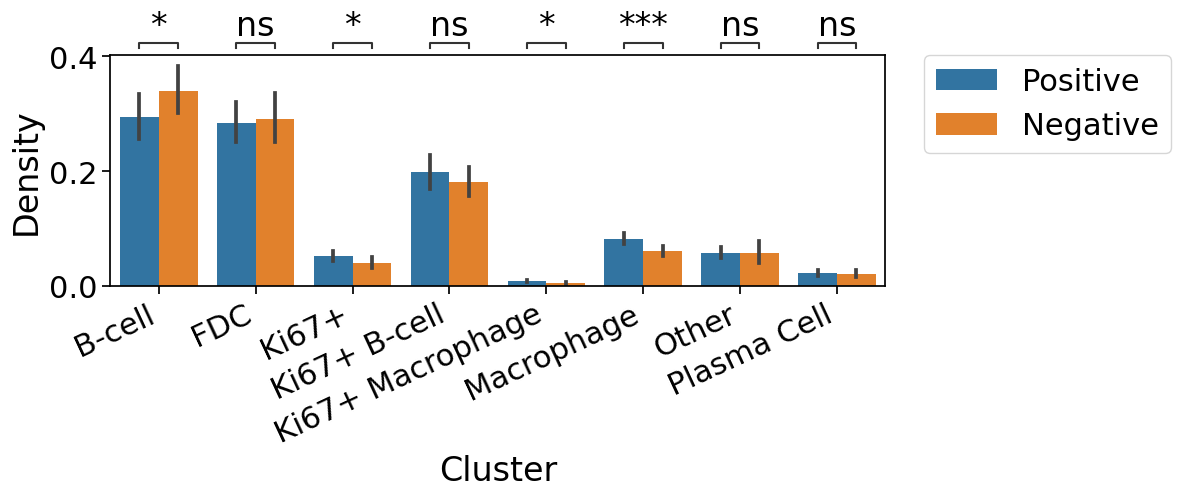

In [119]:
# Get data
df_a = df[df.Dataset.str.contains('A')]
df_subset = df_a.drop(['Foll', 'Dataset'], axis=1)
df_melt = df_subset.melt(id_vars=['Covid'], value_name='Density')

# plot
x = 'Cluster'
y = 'Density'
hue = 'Covid'
with sns.plotting_context('notebook', font_scale=2):
    pairs=[((c,'Positive'),(c,'Negative')) for c in df_melt.Cluster.unique()]

    fig, ax = plt.subplots(figsize=(10,3))
    sns.barplot(data=df_melt, x=x, y=y, hue=hue)
    plt.xticks(rotation = 25, ha="right")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    annotator = Annotator(ax, pairs, data=df_melt, x=x, y=y, hue=hue)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()


In [120]:
# Get data
df_subset = df.drop(['Foll', 'Covid'], axis=1)
df_subset['Dataset'] = df_subset['Dataset'].apply(lambda x: {'A': 'Adenoid', 'T':'Tonsil'}.get(x[:1],x))
df_melt = df_subset.melt(id_vars=['Dataset'], value_name='Density')

# plot
x = 'Cluster'
y = 'Density'
hue = 'Dataset'
with sns.plotting_context('notebook', font_scale=2):
    pairs=[((c,'Adenoid'),(c,'Tonsil')) for c in df_melt.Cluster.unique()]

    fig, ax = plt.subplots(figsize=(10,3))
    sns.barplot(data=df_melt, x=x, y=y, hue=hue)
    plt.xticks(rotation = 25, ha="right")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    annotator = Annotator(ax, pairs, data=df_melt, x=x, y=y, hue=hue)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
    annotator.apply_and_annotate()
    plt.show()


c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\thu71\AppData\Local\anaconda3\envs\torch\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FDC_Adenoid vs. FDC_Tonsil: Mann-Whitney-Wilcoxon test two-sided, P_val:3.318e-04 U_stat=2.180e+04
B-cell_Adenoid vs. B-cell_Tonsil: Mann-Whitney-Wilcoxon test two-sided, P_val:6.143e-01 U_stat=1.712e+04
Ki67+_Adenoid vs. Ki67+_Tonsil: Mann-Whitney-Wilcoxon test two-sided, P_val:7.126e-01 U_stat=1.727e+04
Ki67+ B-cell_Adenoid vs. Ki67+ B-cell_Tonsil: Mann-Whitney-Wilcoxon test two-sided, P_val:5.948e-01 U_stat=1.830e+04
Ki67+ Macrophage_Adenoid vs. Ki67+ Macrophage_Tonsil: Mann-Whitney-Wilcoxon test two-sided, P_val:5.169e-02 U_stat=1.547e+04
Macrophage_Adenoid vs. Macrophage_Tonsil: Mann-Whitney-Wilcoxon test two-sided, P_val:5.196e-06 U_stat=1.248e+04
Other_Adenoid vs. Other_Tonsil: Mann-Whitney-Wilcoxon test two-sided, P_val:1.870e-03 U_stat=2.125e+04
Plasma Cell_Adenoid vs. Plasma Cell_Tonsil: Mann-Whitn

# Spatial occurance

In [22]:
import multiprocessing
import spatial as sm
import palettable
heatmap_cmp = palettable.cmocean.diverging.Balance_20.mpl_colormap
heatmap_cmp_r = palettable.cmocean.diverging.Balance_20_r.mpl_colormap

n_cpu = multiprocessing.cpu_count()

In [23]:
# Covid mapping from patient id to covid. Covid = 1, Normal = 0
covid_dict = {'3': 'Negative', '5': 'Positive', '6': 'Negative', '8':'Positive',
             '11': 'Positive', '18': 'Negative', '21':'Negative', '22': 'Positive'}

In [24]:
adata_foll.obs['Tissue'] = adata_foll.obs['Dataset'].str[0].apply(lambda x: {'A': 'Adenoid', 'T': 'Tonsil'}.get(x,x))
adata_foll.obs['Covid'] = adata_foll.obs['Dataset'].str[1:].apply(lambda x: covid_dict.get(x,x)) 
adata_foll.obs['Foll_id'] = adata_foll.obs[['Dataset','Foll']].astype(str).apply("_".join, axis=1)

In [28]:
# Add centroid to dataset
adata_foll.obs['X_centroid'] = adata_foll.obsm['spatial'][:,0]
adata_foll.obs['Y_centroid'] = adata_foll.obsm['spatial'][:,1]
adata_foll.obs = adata_foll.obs.reset_index(drop=True)

var = 'name'

In [30]:
# # Plot example of spatial projection
# for d in adata_foll.obs.Tissue.unique():
#     print(d)
#     adata_subset = adata_foll[adata_foll.obs.Tissue == d, :]
    
#     with sns.plotting_context('talk', font_scale=1.2):
#         adata_subset = sm.tl.spatial_interaction(adata_subset,
#                                              method='radius', 
#                                              radius=53, 
#                                              knn=15,
#                                              phenotype=var,
#                                              imageid='Dataset',
#                                              pval_method='zscore',
#                                              x_coordinate='X_centroid',
#                                              y_coordinate='Y_centroid')
        
#         sm.pl.spatial_interaction(adata_subset, 
#                           summarize_plot=True, 
#                           binary_view=False,
#                           row_cluster=False, 
#                           linewidths=0.75, 
#                           linecolor='black',
#                           cmap=heatmap_cmp,
#                           p_val=0.05,
#                           nonsig_color='k',
#                           cbar_pos=(0.,0.644,0.04, 0.15)    
#                          )
# #         sm.tl.spatial_distance(adata_subset, x_coordinate='X_centroid', phenotype=var,
# #                               y_coordinate='Y_centroid', imageid='Dataset')

# #         sm.pl.spatial_distance(adata_subset,  phenotype=var, imageid='Dataset', heatmap_cmap=heatmap_cmp_r,
# #                        linewidths=0.75, linecolor='black', cbar_pos=(0.,0.644,0.04, 0.15), log=True)
#         plt.show()

In [31]:
# Plot example of spatial projection
for d in adata_foll.obs.Covid.unique():
    adata_subset = adata_foll[adata_foll.obs.Covid == d, :]
    print(d)
    with sns.plotting_context('talk', font_scale=1.2):
        adata_subset = sm.tl.spatial_interaction(adata_subset,
                                             method='radius', 
                                             radius=53, 
                                             knn=15,
                                             phenotype=var,
                                             imageid='Dataset',
                                             pval_method='zscore',
                                             x_coordinate='X_centroid',
                                             y_coordinate='Y_centroid')
        
        sm.pl.spatial_interaction(adata_subset, 
                          summarize_plot=True, 
                          binary_view=False,
                          row_cluster=False, 
                          linewidths=0.75, 
                          linecolor='black',
                          cmap=heatmap_cmp,
                          p_val=0.05,
                          nonsig_color='k',
                          cbar_pos=(0.,0.644,0.04, 0.15)    
                         )
#         sm.tl.spatial_distance(adata_subset, x_coordinate='X_centroid', phenotype=var,
#                               y_coordinate='Y_centroid', imageid='Dataset')

#         sm.pl.spatial_distance(adata_subset,  phenotype=var, imageid='Dataset', heatmap_cmap=heatmap_cmp_r,
#                        linewidths=0.75, linecolor='black', cbar_pos=(0.,0.644,0.04, 0.15), log=True)
        plt.show()

Positive
Processing Image: ['A11']
Categories (1, object): ['A11']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A22']
Categories (1, object): ['A22']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A8']
Categories (1, object): ['A8']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T22']
Categories (1, object): ['T22']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T5']
Categories (1, object): ['T5']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T8']
Categories (1, object): ['T8']
Identifying neighbours within 53 pixels of every cell


C:\Users\thu71\Anaconda3\envs\snowflake\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\snowflake\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Negative
Processing Image: ['A18']
Categories (1, object): ['A18']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A21']
Categories (1, object): ['A21']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A6']
Categories (1, object): ['A6']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T18']
Categories (1, object): ['T18']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T3']
Categories (1, object): ['T3']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T6']
Categories (1, object): ['T6']
Identifying neighbours within 53 pixels of every cell


C:\Users\thu71\Anaconda3\envs\snowflake\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\snowflake\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


# Compare spatial interaction to basline with Covid positive and negative

In [32]:
adata_foll = sm.tl.spatial_interaction(adata_foll,
                                     method='radius', 
                                     radius=53, 
                                     knn=15,
                                     phenotype=var,
                                     imageid='Dataset',
                                     pval_method='zscore',
                                     x_coordinate='X_centroid',
                                     y_coordinate='Y_centroid')

Processing Image: ['A11']
Categories (1, object): ['A11']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A18']
Categories (1, object): ['A18']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A21']
Categories (1, object): ['A21']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A22']
Categories (1, object): ['A22']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A6']
Categories (1, object): ['A6']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A8']
Categories (1, object): ['A8']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T18']
Categories (1, object): ['T18']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T22']
Categories (1, object): ['T22']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T3']
Categories (1, object): ['T3']
Identifying neighbours within 53 pixels of every cel

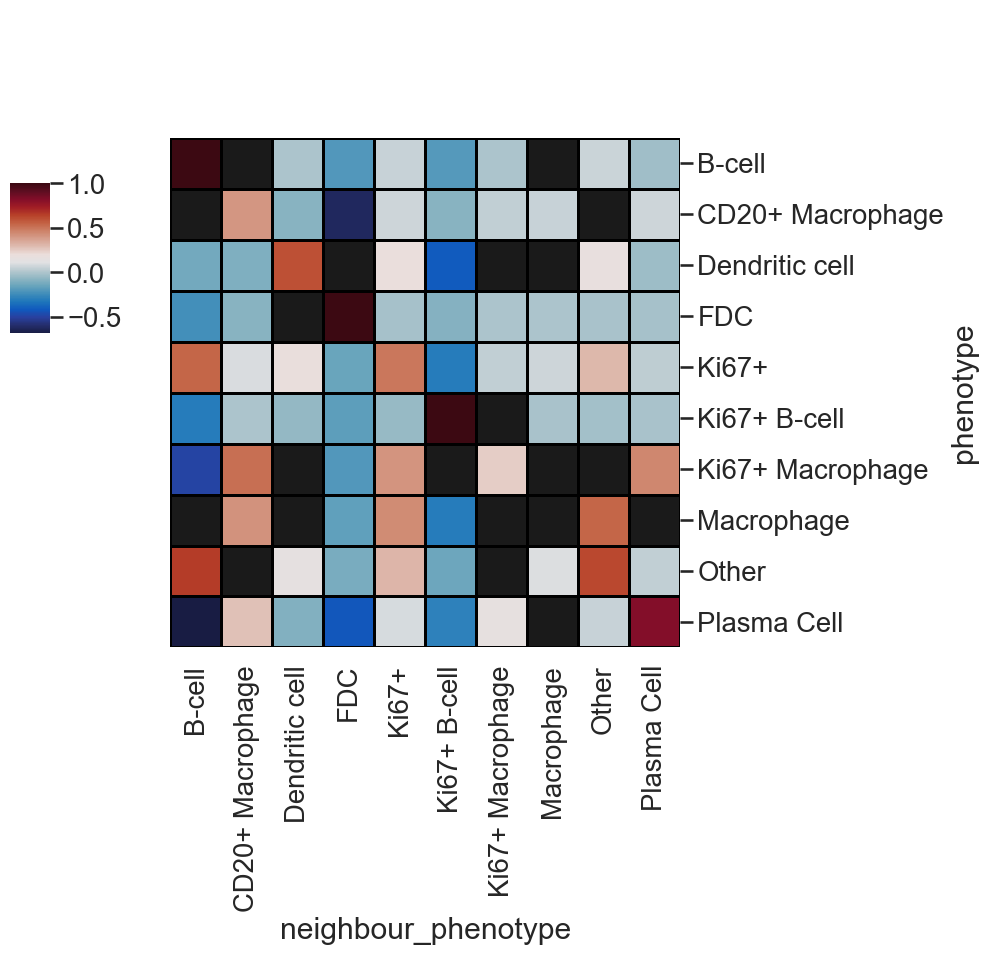

In [33]:
with sns.plotting_context('talk', font_scale=1.2):
    sm.pl.spatial_interaction(adata_foll, 
                      summarize_plot=True, 
                      binary_view=False,
                      row_cluster=False, 
                      linewidths=0.75, 
                      linecolor='black',
                      cmap=heatmap_cmp,
                      p_val=0.05,
                      nonsig_color='k',
                      cbar_pos=(0.,0.644,0.04, 0.15)  
                    )

In [34]:
# adata_foll.write_h5ad((Path().cwd().parents[0]).absolute() / 'data' / 'adata'/'interaction.h5ad')

In [36]:
adata_foll.obs.Covid.unique()

['Positive', 'Negative']
Categories (2, object): ['Negative', 'Positive']

In [63]:
# Positive interacton matrix
adata_positive = adata_foll[adata_foll.obs.Covid == 'Positive', :]
    
adata_positive = sm.tl.spatial_interaction(adata_positive,
                                     method='radius', 
                                     radius=53, 
                                     knn=15,
                                     phenotype=var,
                                     imageid='Dataset',
                                     pval_method='zscore',
                                     x_coordinate='X_centroid',
                                     y_coordinate='Y_centroid')

Processing Image: ['A11']
Categories (1, object): ['A11']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A22']
Categories (1, object): ['A22']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A8']
Categories (1, object): ['A8']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T22']
Categories (1, object): ['T22']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T5']
Categories (1, object): ['T5']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T8']
Categories (1, object): ['T8']
Identifying neighbours within 53 pixels of every cell


C:\Users\thu71\Anaconda3\envs\snowflake\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\snowflake\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [64]:
# Negative interacton matrix
adata_negative = adata_foll[adata_foll.obs.Covid == 'Negative', :]
    
adata_negative = sm.tl.spatial_interaction(adata_negative,
                                     method='radius', 
                                     radius=53, 
                                     knn=15,
                                     phenotype=var,
                                     imageid='Dataset',
                                     pval_method='zscore',
                                     x_coordinate='X_centroid',
                                     y_coordinate='Y_centroid')

Processing Image: ['A18']
Categories (1, object): ['A18']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A21']
Categories (1, object): ['A21']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['A6']
Categories (1, object): ['A6']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T18']
Categories (1, object): ['T18']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T3']
Categories (1, object): ['T3']
Identifying neighbours within 53 pixels of every cell
Processing Image: ['T6']
Categories (1, object): ['T6']
Identifying neighbours within 53 pixels of every cell


C:\Users\thu71\Anaconda3\envs\snowflake\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\snowflake\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [141]:
with sns.plotting_context('talk', font_scale=1.7):
    sm.pl.spatial_interaction(adata_foll, 
                      summarize_plot=True, 
                      binary_view=False,
                      row_cluster=False, 
                      linewidths=0.75, 
                      linecolor='black',
                      cmap=heatmap_cmp,
                      p_val=1.0,
                      nonsig_color='k',
                      cbar_pos=(0.,0.644,0.04, 0.15)  
                    )

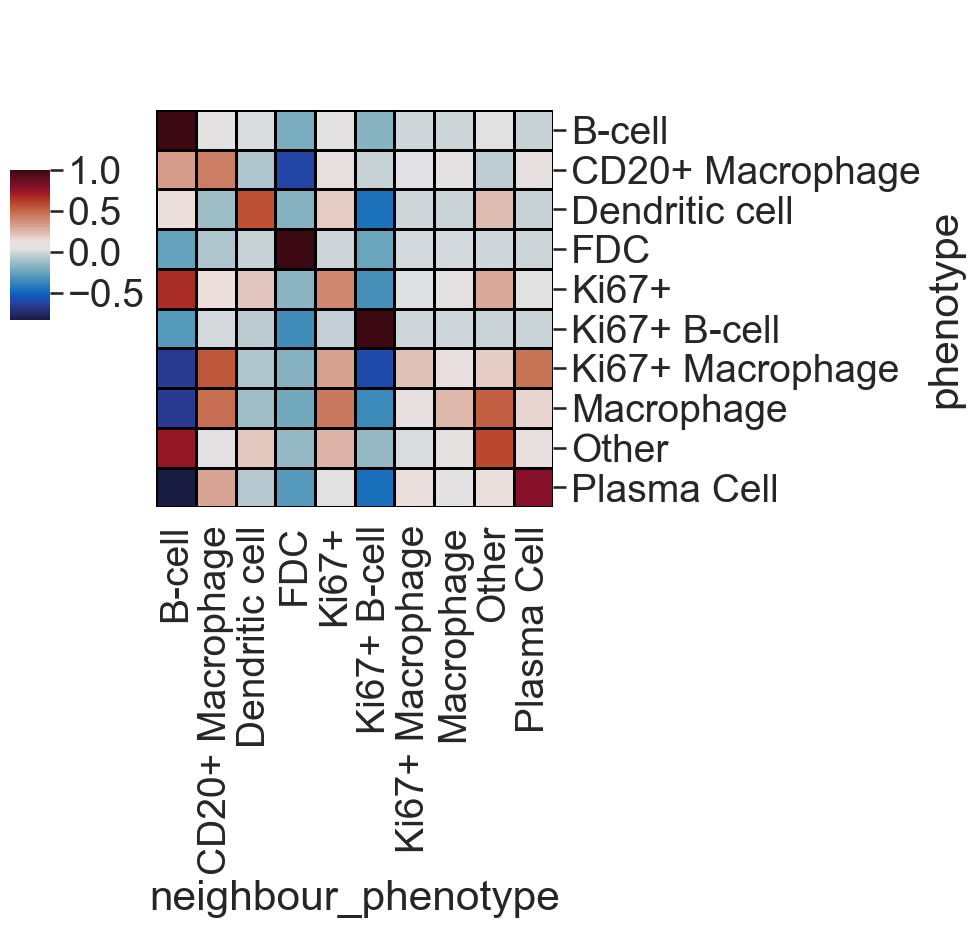

In [116]:
with sns.plotting_context('talk', font_scale=1.7):
    sm.pl.spatial_interaction(adata_negative, 
                      summarize_plot=True, 
                      binary_view=False,
                      row_cluster=False, 
                      linewidths=0.75, 
                      linecolor='black',
                      cmap=heatmap_cmp,
                      p_val=1.0,
                      nonsig_color='k',
                      cbar_pos=(0.,0.644,0.04, 0.15)  
                    )

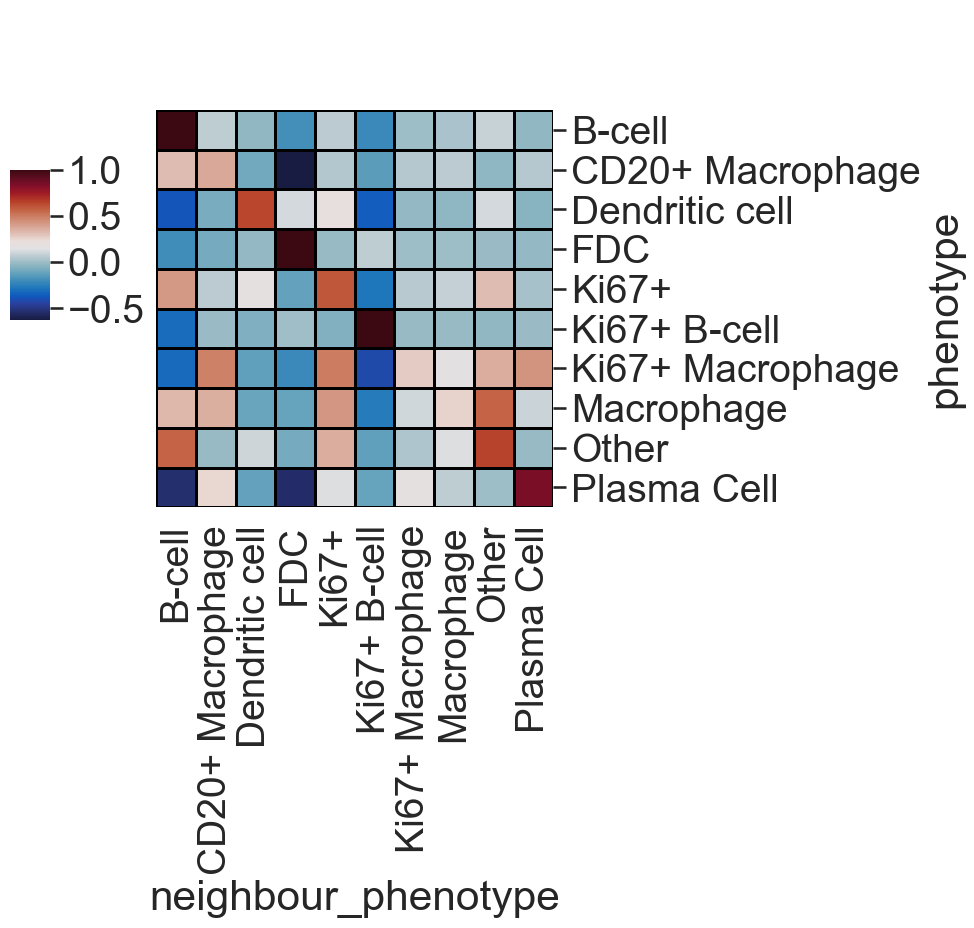

In [117]:
with sns.plotting_context('talk', font_scale=1.7):
    sm.pl.spatial_interaction(adata_positive, 
                      summarize_plot=True, 
                      binary_view=False,
                      row_cluster=False, 
                      linewidths=0.75, 
                      linecolor='black',
                      cmap=heatmap_cmp,
                      p_val=1.0,
                      nonsig_color='k',
                      cbar_pos=(0.,0.644,0.04, 0.15)  
                    )

In [140]:
# # save interaction data
# adata_foll.write_h5ad((Path().cwd().parents[0]).absolute() / 'data' / 'adata'/'interaction.h5ad')
# adata_positive.write_h5ad((Path().cwd().parents[0]).absolute() / 'data' / 'adata'/'interaction_pos.h5ad')
# adata_negative.write_h5ad((Path().cwd().parents[0]).absolute() / 'data' / 'adata'/'interaction_neg.h5ad')

## Statistical anaylsis 

In [118]:
def get_interac(adata):
    interaction_map = adata.uns['spatial_interaction']
    p_value = interaction_map.filter(regex='pvalue_')    
    p_val_df = pd.concat([interaction_map[['phenotype','neighbour_phenotype']], p_value], axis=1, join='outer')
    p_val_df = p_val_df.set_index(['phenotype','neighbour_phenotype'])
    interaction_map = interaction_map[interaction_map.columns.difference(p_value.columns)]
    return p_val_df, interaction_map

In [119]:
p_value_df, interaction_map = get_interac(adata_foll)
interaction_map = interaction_map.set_index(['phenotype','neighbour_phenotype'])


In [120]:
# Get positive and negative interaction information
p_value_df_neg, interaction_map_neg = get_interac(adata_negative)
interaction_map_neg = interaction_map_neg.set_index(['phenotype','neighbour_phenotype'])

p_value_df_pos, interaction_map_pos = get_interac(adata_positive)
interaction_map_pos= interaction_map_pos.set_index(['phenotype','neighbour_phenotype'])

In [121]:
interaction_map_pos['mean'] = interaction_map_pos.mean(axis=1).values
interaction_map_neg['mean'] = interaction_map_neg.mean(axis=1).values
interaction_map['mean'] = interaction_map.mean(axis=1).values


In [128]:
df_diff = interaction_map_pos[['mean']] - interaction_map_neg[['mean']]
df_diff = df_diff.unstack().droplevel(0, axis=1)
mask = (df_diff > -0.1) & (df_diff < 0.1)

cmap_updated = matplotlib.cm.get_cmap('vlag')
cmap_updated.set_bad(color='k')
    
with sns.plotting_context('talk', font_scale=1.7):
    sns.clustermap(df_diff, cmap=cmap_updated, linewidths=0.75, 
                  linecolor='black', row_cluster=False, col_cluster=False,
                  cbar_pos=(0.,0.644,0.03, 0.15), vmax=0.5, vmin=-0.5)

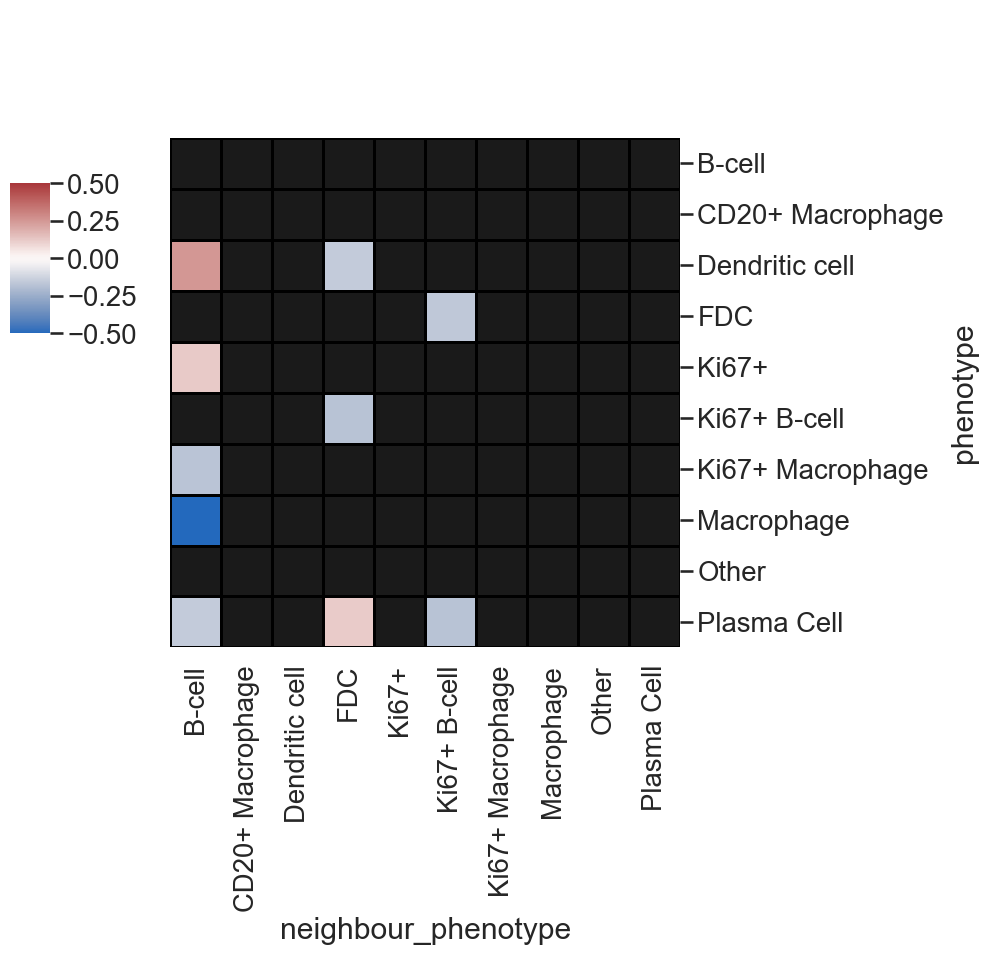

In [108]:
df_diff = interaction_map_neg[['mean']] - interaction_map[['mean']]
df_diff = df_diff.unstack().droplevel(0, axis=1)
mask = (df_diff > -0.1) & (df_diff < 0.1)

cmap_updated = matplotlib.cm.get_cmap('vlag')
cmap_updated.set_bad(color='k')
    
with sns.plotting_context('talk', font_scale=1.2):
    sns.clustermap(df_diff, cmap=cmap_updated, linewidths=0.75, 
                  linecolor='black', row_cluster=False, col_cluster=False,
                  cbar_pos=(0.,0.644,0.04, 0.15), vmax=0.5, vmin=-0.5, mask=mask,)

# Spatial Permutation plot

In [129]:
import multiprocessing
import spatial as sm
import palettable
import sklearn 

# Import spatial omics library
import athena as ath
from spatialOmics import SpatialOmics
from matplotlib.colors import ListedColormap, hex2color

heatmap_cmp = palettable.cmocean.diverging.Balance_20.mpl_colormap
heatmap_cmp_r = palettable.cmocean.diverging.Balance_20_r.mpl_colormap

n_cpu = multiprocessing.cpu_count()

In [130]:
from skimage import measure, morphology

def get_contour(mask: np.ndarray):
    """
    Get contours of mask
    """
    contours = []
    for i in sorted(np.unique(mask)):
        if i == 0:
            continue
        contours.append(measure.find_contours(mask == i, 0.8)[0])

    return contours

In [131]:
fig_path = (Path().cwd().parents[0]).absolute() / 'figures' / 'follicles'

# Plot example of spatial projection
for d in adata_foll.obs.Dataset.unique():
    if d != 'T22':
        continue
    adata_donor = adata_foll[adata_foll.obs.Dataset == d, :]
    
    # Get spatial omics dataset
    dataset = f'07_{d}'
    path = spatial_omics_folder / f'{dataset}.hdf5'
    spadata = SpatialOmics.from_h5py(path)
    
    # Loop through follicles
    for foll in spadata.spl.Foll:
        print(d, foll)
        if foll != 40:
            continue

        adata_f = adata_donor[adata_donor.obs.Foll == foll]
        
        spadata.obs[str(foll)]['name'] = adata_f.obs.name.tolist()
        spadata.obs[str(foll)]['name']  = spadata.obs[str(foll)]['name'].astype('category')
        
        # Added colormap to spadata object
        # we have some overhead here as we need to convert to numeric types for the ATHENA framework
        spl = str(foll)
        spadata.obs[spl]['name_id'] = spadata.obs[spl].groupby('name').ngroup().astype('category')
        
        mask = spadata.masks[str(foll)]['cellmasks']
        contours = get_contour(mask)
        
        # generate colormap
        labs = spadata.obs[spl].groupby(['name_id']).head(1)[['name_id', 'name']].set_index('name_id').to_dict()
        cmap = ListedColormap([hex2color(i) for i in adata_f.uns['name_colors']])
        spadata.uns['cmaps'].update({'name_id':cmap})
        spadata.uns['cmap_labels'].update({'name_id': labs['name']})
        break
    

T22 1
T22 2
T22 3
T22 4
T22 5
T22 6
T22 7
T22 8
T22 9
T22 10
T22 11
T22 12
T22 13
T22 14
T22 15
T22 16
T22 17
T22 18
T22 19
T22 20
T22 21
T22 22
T22 23
T22 24
T22 25
T22 26
T22 27
T22 28
T22 29
T22 30
T22 31
T22 32
T22 33
T22 34
T22 35
T22 36
T22 37
T22 38
T22 39
T22 40


In [132]:
spadata.obs[str(foll)]['name_id_perm'] = sklearn.utils.shuffle(spadata.obs[spl]['name_id'].tolist(), random_state=0)
spadata.uns['cmaps'].update({'name_id_perm':cmap})
spadata.uns['cmap_labels'].update({'name_id_perm': labs['name']})

In [133]:
spadata.obs[str(foll)]

ROI    Cell  Cell_ROI Dataset Data  Foll  GC            y           x  \
679412   59  679412      7598     T22   07    40   0     2.948052  711.811688   
679414   59  679414      7600     T22   07    40   0     5.178571  823.065476   
679464   59  679464      7650     T22   07    40   0     7.467433  777.835249   
679473   59  679473      7659     T22   07    40   0    10.547059  727.300000   
679474   59  679474      7660     T22   07    40   0    13.086538  753.862179   
...     ...     ...       ...     ...  ...   ...  ..          ...         ...   
689761   60  689761      4450     T22   07    40   0  1447.760331  866.925620   
689762   60  689762      4451     T22   07    40   0  1447.436090  883.406015   
689772   60  689772      4461     T22   07    40   0  1449.161290  715.629032   
689773   60  689773      4462     T22   07    40   0  1443.888889  897.243590   
689780   60  689780      4469     T22   07    40   0  1450.333333  775.770115   

                    name name_id  name_id_perm  
679412       Plasma Cell       9             1  
679414       Plasma Cell       9             4  
679464       Plasma Cell       9             4  
679473       Plasma Cell       9             1  
679474       Plasma Cell       9             4  
...                  ...     ...           ...  
689761  CD20+ Macrophage       1             0  
689762  CD20+ Macrophage       1             5  
689772             Ki67+       4             2  
689773             Other       8             0  
689780            B-cell       0             9  

[6330 rows x 12 columns]

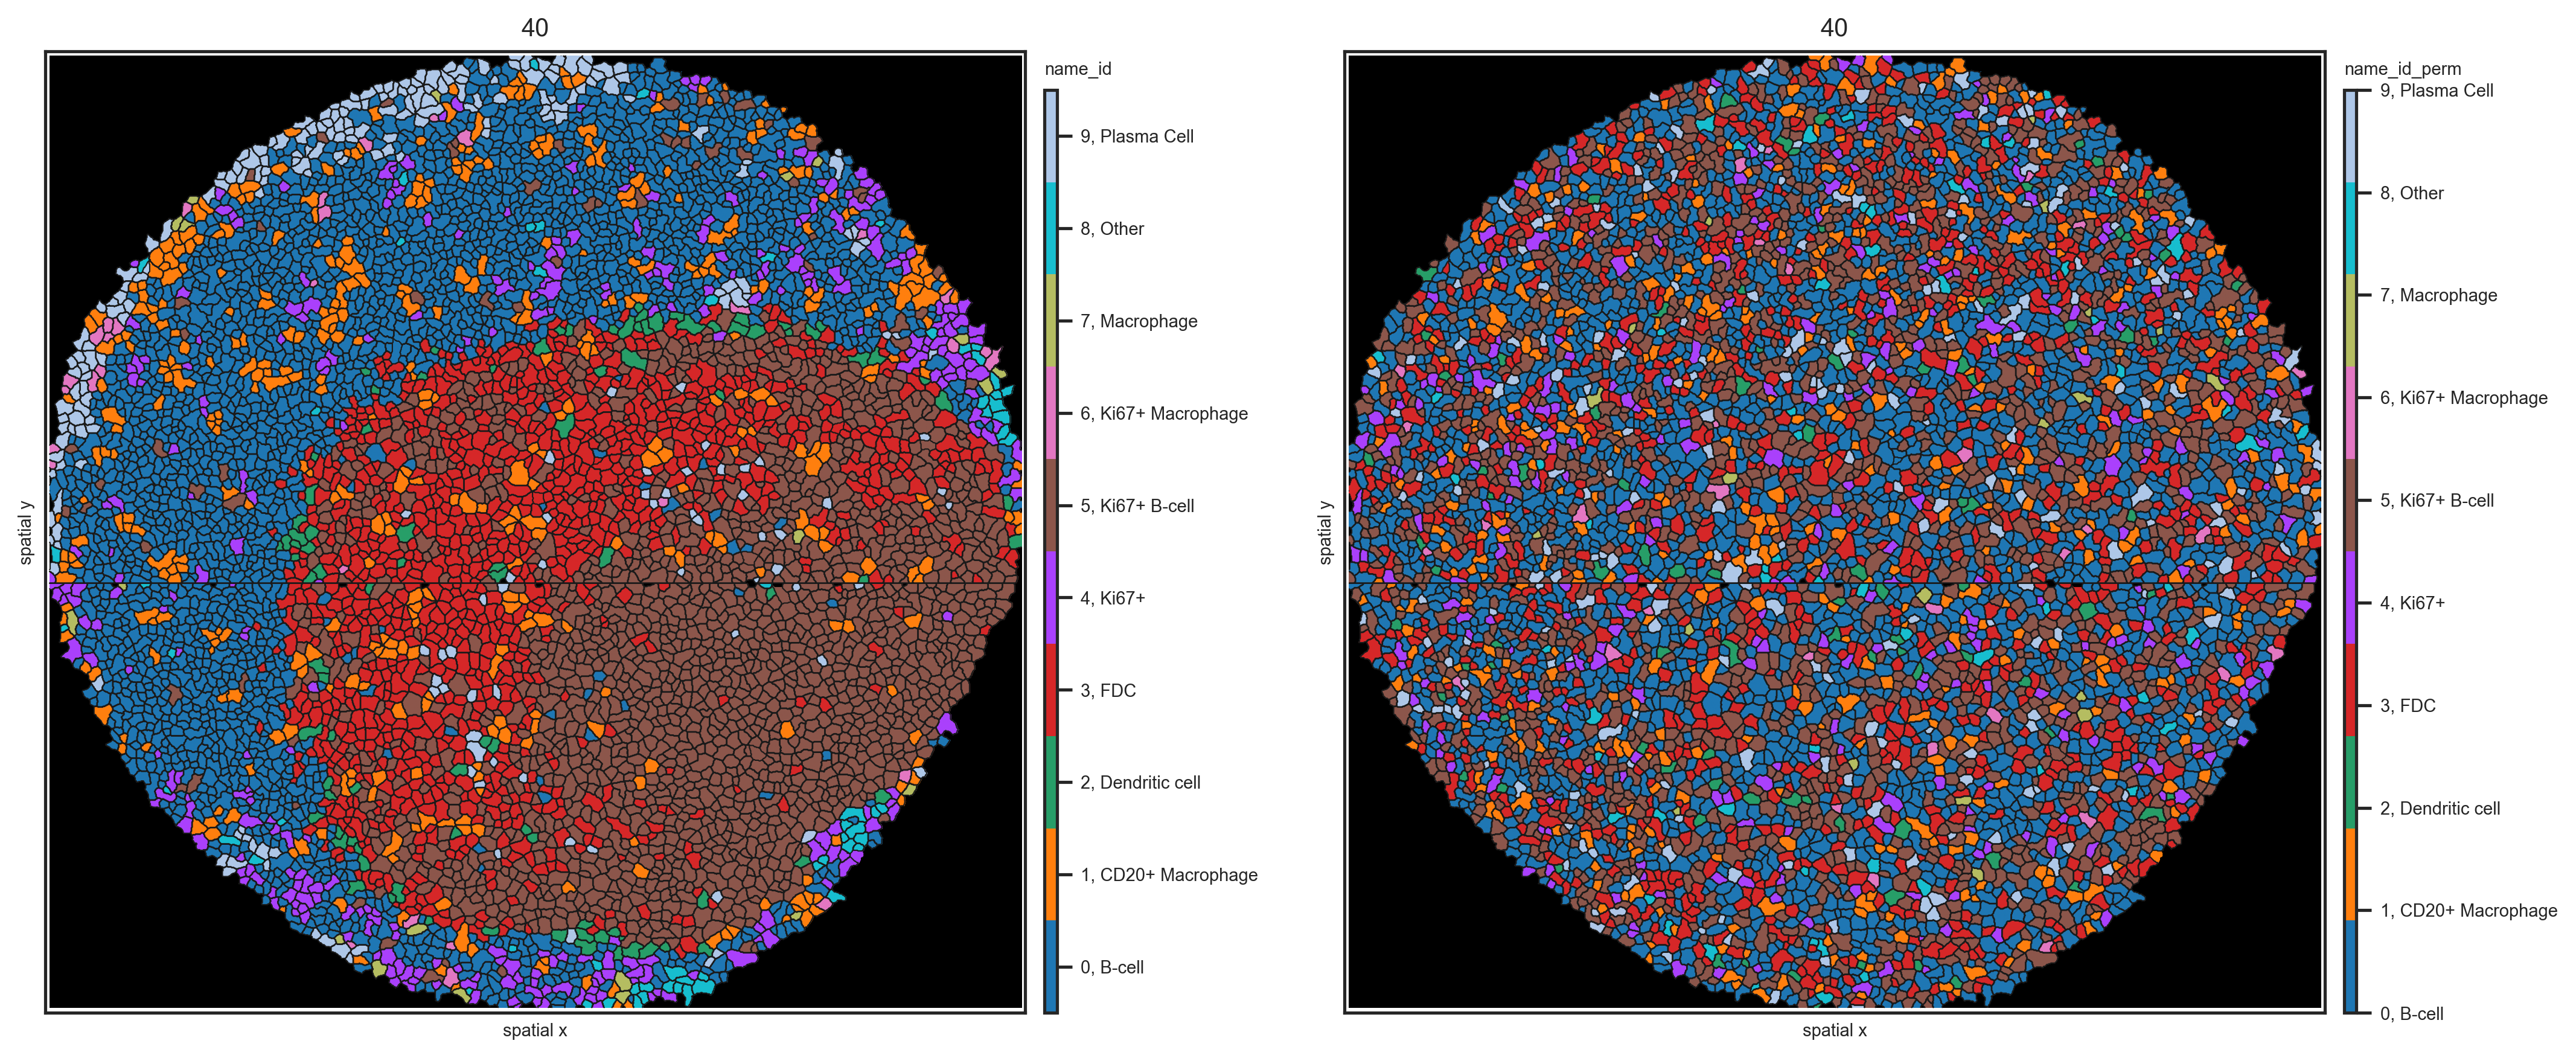

In [134]:
# Loop through follicles 
fig, axs = plt.subplots(1, 2, figsize=(15, 6), dpi=300)
ath.pl.spatial(spadata, str(foll), attr='name_id', mode='mask', ax=axs.flat[0], background_color='black')
for j, contour in enumerate(contours):
    axs.flat[0].plot(contour[:, 1], contour[:, 0], linewidth=0.5, color="k")
ath.pl.spatial(spadata, str(foll), attr='name_id_perm', mode='mask', ax=axs.flat[1], background_color='black')
for j, contour in enumerate(contours):
    axs.flat[1].plot(contour[:, 1], contour[:, 0], linewidth=0.5, color="k")
axs.flat[0].invert_yaxis()
axs.flat[1].invert_yaxis()

In [135]:
df_count = pd.DataFrame(spadata.obs[str(foll)].groupby('name').size()).reset_index()
df_count.columns = ['Cluster', 'Count']

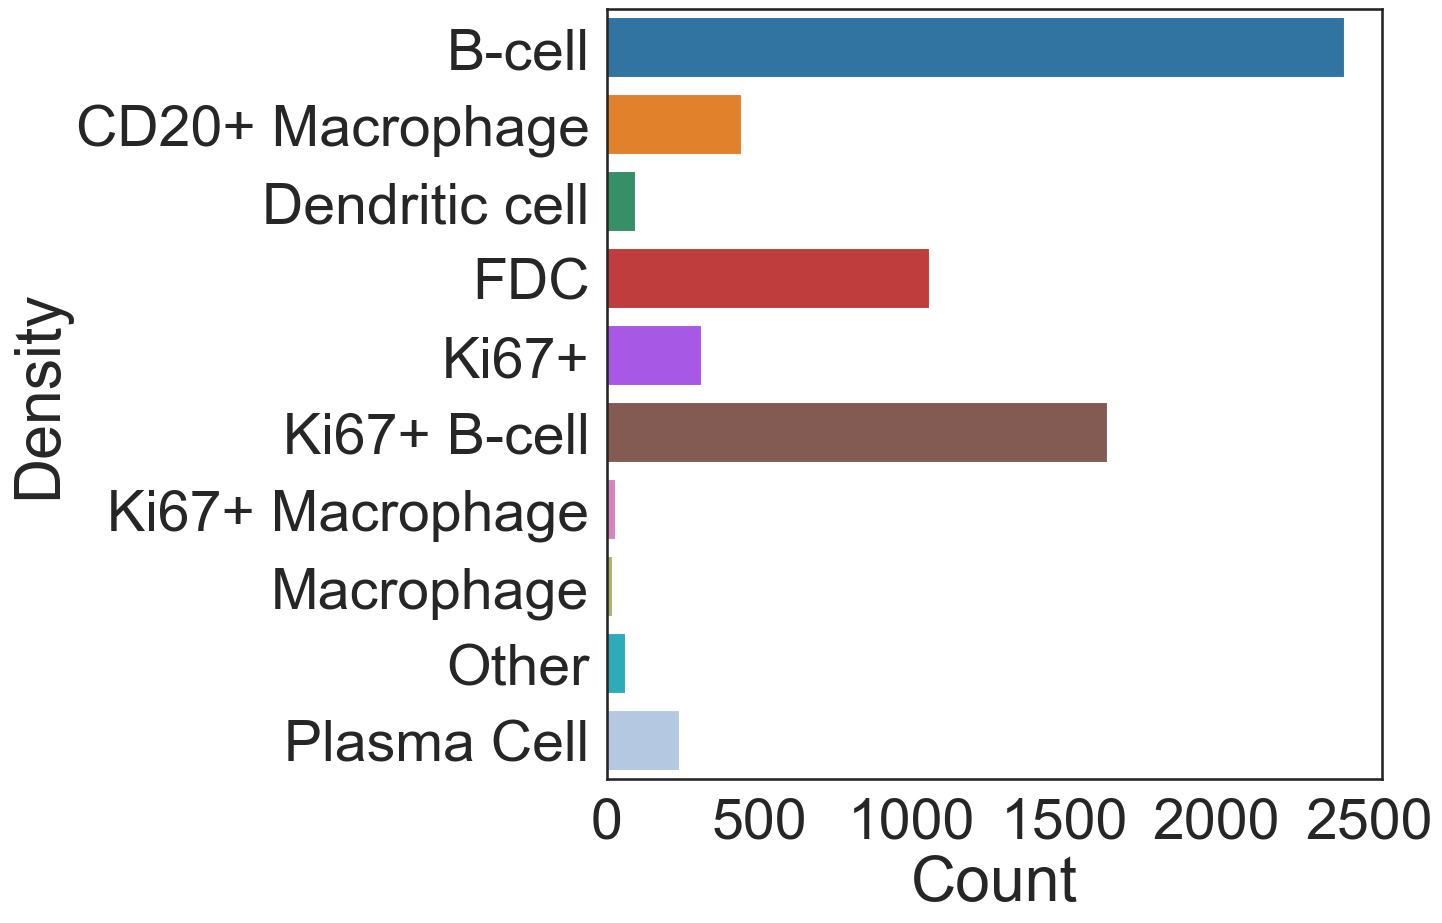

In [139]:
with sns.plotting_context('talk', font_scale=2.5):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax = sns.barplot(data=df_count, y='Cluster', x='Count',
                 palette=adata_foll.uns['name_colors'])
    ax.set_ylabel('Density')
    ax.grid(False)

In [137]:
adata_test = sm.tl.spatial_interaction(adata_f,
                                             method='radius', 
                                             radius=53, 
                                             knn=15,
                                             phenotype=var,
                                             imageid='Foll_id',
                                             pval_method='zscore',
                                             x_coordinate='X_centroid',
                                             y_coordinate='Y_centroid')

Processing Image: ['T22_40']
Categories (1, object): ['T22_40']
Identifying neighbours within 53 pixels of every cell


C:\Users\thu71\Anaconda3\envs\snowflake\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
C:\Users\thu71\Anaconda3\envs\snowflake\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


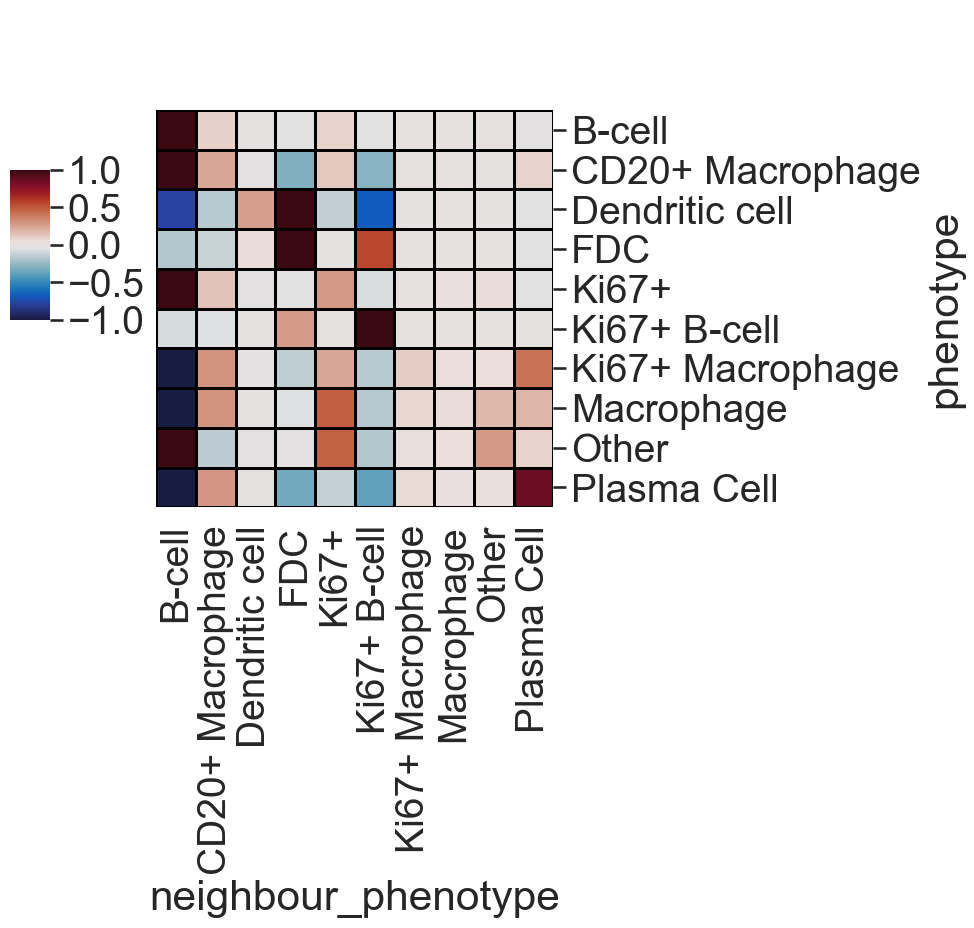

In [138]:
with sns.plotting_context('talk', font_scale=1.7):
    sm.pl.spatial_interaction(adata_f, 
                              summarize_plot=True, 
                              binary_view=False,
                              row_cluster=False, 
                              linewidths=0.75, 
                              linecolor='black',
                              cmap=heatmap_cmp,
                              p_val=1.0,
                              nonsig_color='k',
                              cbar_pos=(0.,0.644,0.04, 0.15)    
                             )